# Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [32]:
#Import Libraries
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

In [2]:
#Import dataset
gasturbine = pd.read_csv("gas_turbines.csv")
gasturbine

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# Data understanding / EDA:
Descriptive Analysis:

In [3]:
gasturbine.shape

(15039, 11)

In [4]:
gasturbine.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [5]:
gasturbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


no null values in the data set

In [6]:
gasturbine.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [7]:
gasturbine[gasturbine.duplicated()].shape

(0, 11)

In [8]:
gasturbine.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


# Correlation

In [9]:
gasturbine.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<AxesSubplot:>

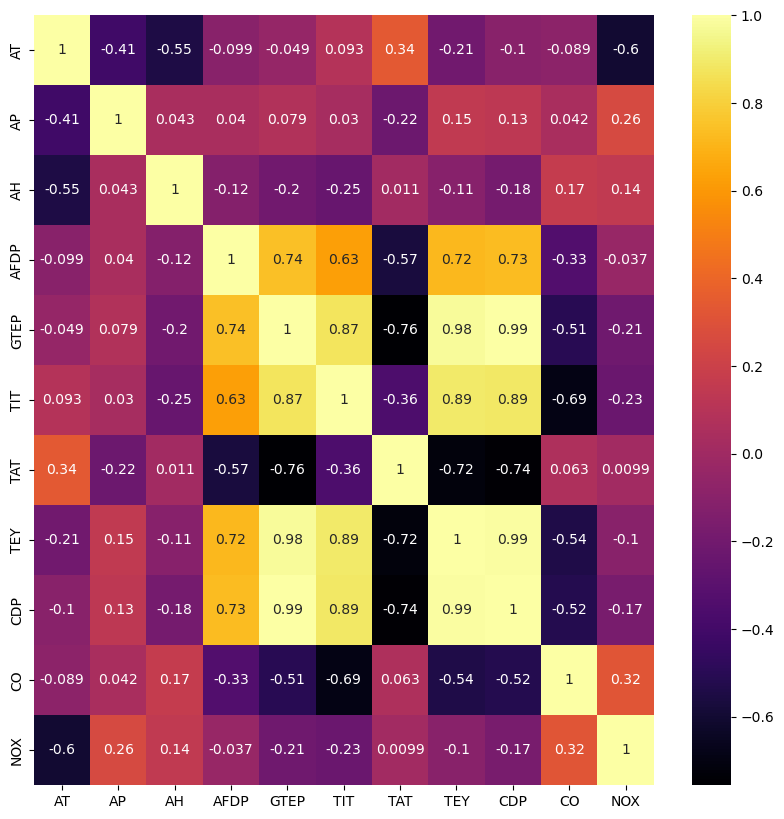

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(gasturbine.corr(),annot=True,cmap="inferno")

# Data Preprocessing

In [11]:
X=gasturbine.drop('TEY',axis=1)
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [12]:
Y=gasturbine['TEY']
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [13]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
X_scaler

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [14]:
scaled_X=pd.DataFrame(X_scaler,columns=X.columns) # giving same column names to scaled data
scaled_X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.422598,1.924683,2.391165


In [15]:
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

# Model Building

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(scaled_X,Y,test_size=0.3,random_state=3)
#splitting the dataset into train and test

In [37]:
#will see the rows count seperated for train test from below code
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10527, 10)
(4512, 10)
(10527,)
(4512,)


The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

Alternatively, the functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers

# create model 

# Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons

# Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons

# Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

In [43]:
n_features=scaled_X.shape[1]
n_features

10

In [44]:
# cteate model
def create_model():
    model=Sequential()
    model.add(Dense(12,input_dim=n_features,kernel_initializer='unifrom',activation='relu')) #1st Layer
    model.add(Dense(8,kernel_initializer='uniform', activation='relu')) #2nd Layer
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid')) #3rd Layer or OP layer
    # here we take loss func as means_squared_error coz its regression classifier
    optmizer=RMSprop(0.03)# Learning_rate is 0.03
    model.compile(loss='mean_squared_error',optimizer=optmizer,metrics=['accuracy'])
    return model

In [45]:
import tensorflow as tf
from tensorflow import keras

In [47]:
# Create the model
model=KerasClassifier(build_fn=create_model,verbose = 0)
# Define the grid search parameters
batch_size=[10,20,40]
epochs=[10,50,100]
# Make a dictionary of the grid search parameters
param_grid=dict(batch_size=batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X,Y)

C:\Users\amit.g\AppData\Local\Temp\ipykernel_15972\1995740843.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=create_model,verbose = 0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   0.1s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   0.0s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   0.0s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   0.0s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .......batch_size=10, epochs=10;, score=nan total time=   0.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .......batch_size=10, epochs=50

C:\Users\amit.g\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\amit.g\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amit.g\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "C:\Users\amit.g\Anaconda3\lib\site-packages\keras\wrappers\scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build

ValueError: Unknown initializer: 'unifrom'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
# we get best learning rate as 0.001 and dropout rate as 0 and best neurons as 4 and 2, so now we can build final model

In [51]:
X_train,X_test,y_train,y_test=train_test_split(scaled_X,Y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10527, 10), (4512, 10), (10527,), (4512,))

In [53]:
# from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

In [54]:
optmizer=RMSprop(0.001)
model_new=keras.Sequential([
    keras.layers.Dense(4,input_dim=(n_features),activation='relu'),
    keras.layers.Dense(2,activation='relu')
])
model_new.compile(optimizer=optmizer,loss='mean_squared_error',metrics=['accuracy'])

In [55]:
seed_value=42;
import random
import tensorflow
tensorflow.random.set_seed(seed_value)
model_new.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
1053/1053 [==============================] - 2s 880us/step - loss: 17095.0332 - accuracy: 0.0000e+00
Epoch 2/10
1053/1053 [==============================] - 1s 743us/step - loss: 12560.7314 - accuracy: 0.0000e+00
Epoch 3/10
1053/1053 [==============================] - 1s 712us/step - loss: 6889.7310 - accuracy: 0.0000e+00
Epoch 4/10
1053/1053 [==============================] - 1s 727us/step - loss: 2621.1584 - accuracy: 0.0000e+00
Epoch 5/10
1053/1053 [==============================] - 1s 722us/step - loss: 573.8967 - accuracy: 0.0000e+00
Epoch 6/10
1053/1053 [==============================] - 1s 713us/step - loss: 277.2767 - accuracy: 0.0000e+00
Epoch 7/10
1053/1053 [==============================] - 1s 727us/step - loss: 186.5841 - accuracy: 0.0000e+00
Epoch 8/10
1053/1053 [==============================] - 1s 726us/step - loss: 132.1046 - accuracy: 0.0000e+00
Epoch 9/10
1053/1053 [==============================] - 1s 782us/step - loss: 95.4384 - accuracy: 0.0000e+00
Epoch

In [56]:
model_new.evaluate(X_test,y_test)

141/141 [==============================] - 0s 989us/step - loss: 59.1330 - accuracy: 0.0000e+00


[59.133033752441406, 0.0]